# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset
df = pd.read_csv("C:/Users/ASUS/Downloads/archive/IRIS.csv")

In [3]:
# Show the first few rows of the dataset
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [5]:
# Check data types and basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Display class distribution
print("Class distribution:\n", df['species'].value_counts())

Class distribution:
 species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


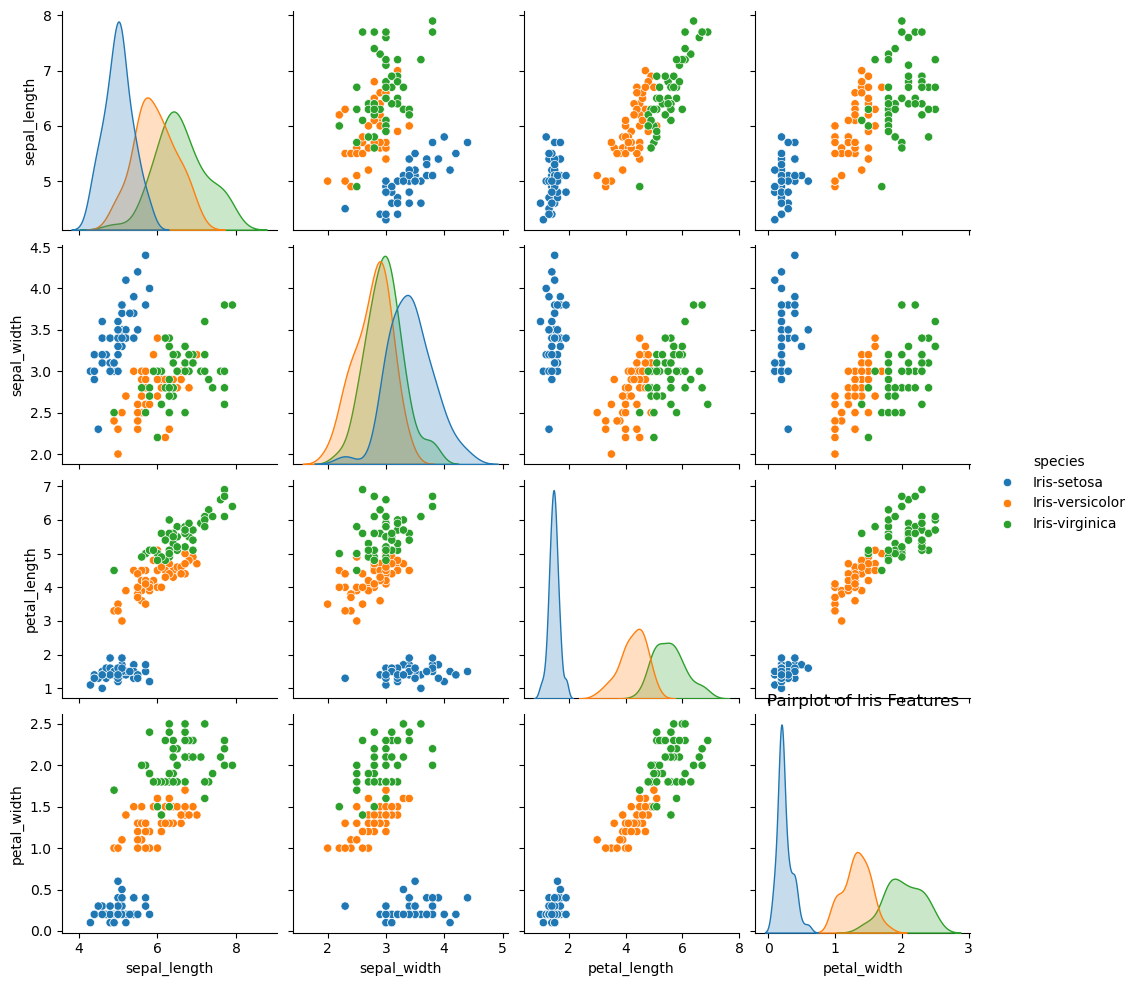

In [7]:
# Visualize pairwise relationships
sns.pairplot(df, hue='species')
plt.title("Pairplot of Iris Features")
plt.show()

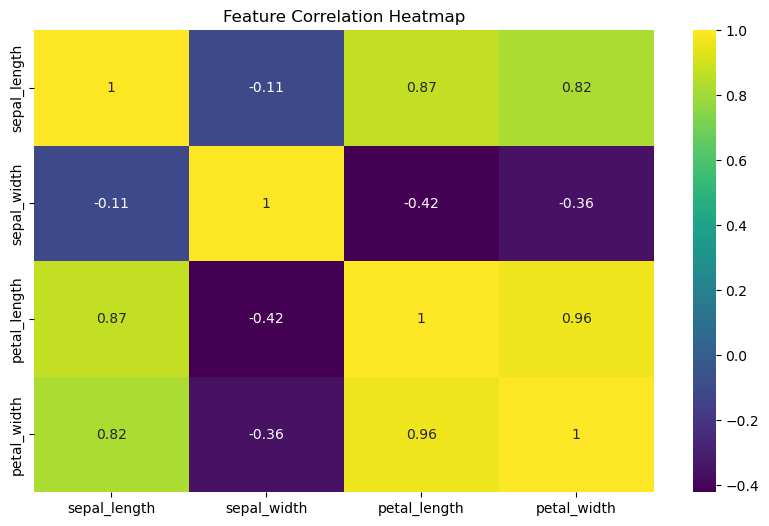

In [9]:
# Correlation heatmap
# First, select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.title("Feature Correlation Heatmap")
plt.show()

# Assistant
This error occurs because you're trying to calculate correlations on a DataFrame that contains string values (like 'Iris-setosa'), which can't be converted to float values for correlation calculations.

The error message indicates that your DataFrame `df` contains categorical string data (like 'Iris-setosa') that can't be used in numerical calculations like correlation.

Would you like me to provide the corrected code?

# Assistant
This error occurs because you're trying to calculate correlations on a DataFrame that contains string values (like 'Iris-setosa'), which can't be converted to float numbers for correlation calculations.

The error message indicates that one of your columns contains categorical data (like flower species names 'Iris-setosa'), which can't be directly used in numerical calculations like correlation.

Would you like me to provide the corrected code?

In [10]:
# Convert 'species' to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])


In [11]:
# Define input (X) and target (y) variables
X = df.drop('species', axis=1)
y = df['species']

In [12]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [14]:
# Predict and evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


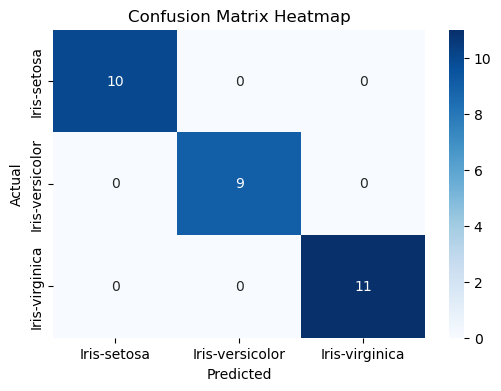

In [15]:
# Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()